In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Model

In [27]:
lr_schedule = ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10000,
    decay_rate = 0.96,
    staircase = True
)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9)

In [28]:
def create_AlexNet_model(include_top=True):
    input = Input((227, 227, 3))

    conv1 = Conv2D(96, (11, 11), padding='valid', strides=(4, 4), activation='relu')(input)
    pooling1 = MaxPooling2D((3, 3), strides=(2, 2))(conv1)

    conv2 = Conv2D(256, (5, 5), padding='same', strides=(1, 1), activation='relu')(pooling1)
    pooling2 = MaxPooling2D((3, 3), strides=(2, 2))(conv2)

    conv3 = Conv2D(384, (3, 3), padding='same', strides=(1, 1), activation='relu')(pooling2)
    conv4 = Conv2D(384, (3, 3), padding='same', strides=(1, 1), activation='relu')(conv3)
    conv5 = Conv2D(256, (3, 3), padding='same', strides=(1, 1), activation='relu')(conv4)

    pooling3 = MaxPooling2D((3, 3), strides=(2, 2))(conv5)

    if include_top == False:
        return Model(inputs=input, outputs=pooling3, name='AlexNet_without_top')

    flatten = Flatten()(pooling3)

    fc1 = Dense(4096, activation='relu', name='FC1')(flatten)
    dropout1 = Dropout(0.5)(fc1)

    fc2 = Dense(4096, activation='relu', name='FC2')(dropout1)
    dropout2 = Dropout(0.5)(fc2)

    out = Dense(1000, activation='softmax', name='predictions')(dropout2)

    model = Model(inputs=input, outputs=out, name='AlexNet')
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    return model

In [29]:
model = create_AlexNet_model()
model.summary()

Model: "AlexNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 98% 575M/586M [00:04<00:00, 138MB/s]
100% 586M/586M [00:04<00:00, 128MB/s]


In [6]:
!unzip /content/animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [7]:
import os
import shutil
import random

def split_data(source_dir, train_dir, val_dir, split_size=0.8):
  if not os.path.exists(train_dir):
    os.makedirs(train_dir)
  if not os.path.exists(val_dir):
    os.makedirs(val_dir)

  for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)

    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    if not os.path.exists(train_category_dir):
      os.makedirs(train_category_dir)
    if not os.path.exists(val_category_dir):
      os.makedirs(val_category_dir)

    items = os.listdir(category_path)
    random.shuffle(items)

    split_point = int(split_size * len(items))

    train_items = items[:split_point]
    val_items = items[split_point:]

    for item in train_items:
      shutil.move(os.path.join(category_path, item), os.path.join(train_category_dir, item))
    for item in val_items:
      shutil.move(os.path.join(category_path, item), os.path.join(val_category_dir, item))

In [8]:
source_dir = '/content/raw-img'
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
split_data(source_dir, train_dir, val_dir)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_generators(train_path, val_path):
  train_datagen = ImageDataGenerator(1/255,
                                     shear_range=0.2,
                                     rotation_range=40,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     zoom_range=0.2)

  val_datagen = ImageDataGenerator(1/255)

  train_generator = train_datagen.flow_from_directory(train_path,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(227,227))

  val_generator = val_datagen.flow_from_directory(val_path,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(227,227))
  return train_generator, val_generator

In [10]:
train_path = '/content/dataset/train'
val_path = '/content/dataset/val'

train_generator, val_generator = create_generators(train_path, val_path)

Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


In [ ]:
lr_schedule = ExponentialDecay(
    initial_learning_rate = 0.0004,
    decay_steps = 3000,
    decay_rate = 0.96,
    staircase = True
)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9)

In [30]:
def custom_AlexNet_model():
  input = Input((227, 227, 3))
  alexnet = create_AlexNet_model(include_top=False)(input)
  flatten = Flatten()(alexnet)
  fc1 = Dense(512, activation='relu', name='FC1')(flatten)
  dropout1 = Dropout(0.25)(fc1)
  fc2 = Dense(512, activation='relu', name='FC2')(dropout1)
  dropout2 = Dropout(0.25)(fc2)
  out = Dense(10, activation='softmax', name='predictions')(dropout2)

  model = Model(inputs=input, outputs=out)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [31]:
model = custom_AlexNet_model()
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ AlexNet_without_top (Functional)     │ (None, 6, 6, 256)           │       3,747,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,734,090 (33.32 MB)

 Trainable params: 8,734,090 (33.32 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=val_generator)

Epoch 1/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 304s 454ms/step - accuracy: 0.1969 - loss: 2.5942 - val_accuracy: 0.2637 - val_loss: 2.0992
Epoch 2/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 312s 442ms/step - accuracy: 0.2721 - loss: 2.1046 - val_accuracy: 0.3017 - val_loss: 2.0453
Epoch 3/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 322s 444ms/step - accuracy: 0.3118 - loss: 2.0107 - val_accuracy: 0.3503 - val_loss: 1.9471
Epoch 4/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 293s 444ms/step - accuracy: 0.3327 - loss: 1.9677 - val_accuracy: 0.3837 - val_loss: 1.8241
Epoch 5/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 319s 440ms/step - accuracy: 0.3501 - loss: 1.9130 - val_accuracy: 0.3814 - val_loss: 1.8195
Epoch 6/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 290s 440ms/step - accuracy: 0.3793 - loss: 1.8404 - val_accuracy: 0.4184 - val_loss: 1.7257
Epoch 7/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 321s 439ms/step - accuracy: 0.3826 - loss: 1.8112 - val_accuracy: 0.4070 - val_loss: 1.7186
Epoch 8/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 325s 443ms/step - accuracy: 0.3967 -

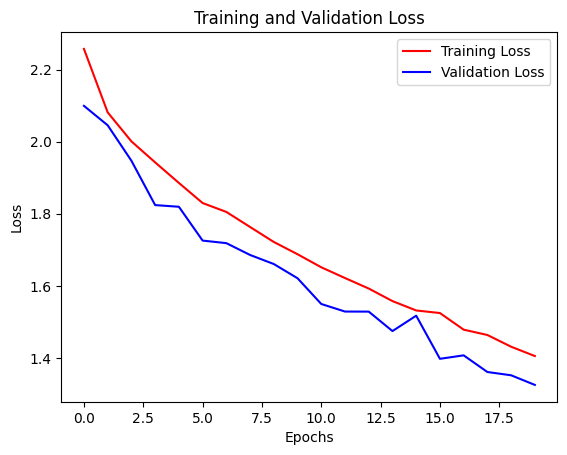

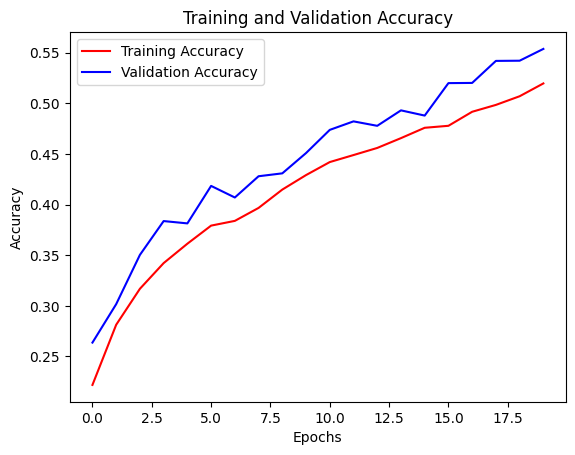

In [33]:
from matplotlib import pyplot as plt

train_loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

train_acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')

epochs = range(len(train_loss))

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
